In [1]:
import pandas as pd

In [2]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns

In [70]:
import plotly.graph_objects as go

In [3]:
import mido
from mido import MidiFile

In [84]:
colormode = "sequential" # "fifths"

In [85]:
freq = pd.read_csv('frequencies.csv').set_index('midi')

In [86]:
letters = list(freq['letter'].dropna().unique())

In [87]:
rainbow = ['red','magenta','slateblue','darkslateblue','royalblue','dodgerblue','mediumseagreen','yellowgreen','yellow','gold','orange','orangered']

In [88]:
if colormode == "sequential": colors = dict(zip(letters,rainbow))

In [89]:
if colormode == "fifths": {'C': 'red','F': 'magenta','A#': 'slateblue','D#': 'darkslateblue','G#': 'royalblue','C#': 'dodgerblue','F#': 'mediumseagreen','B': 'yellowgreen','E': 'yellow','A': 'gold','D': 'orange','G': 'orangered'}

In [90]:
songs = ['baba','badguy','canond','clair','dancingqueen','frere','furelise','happybirthday','heartsoul','littleboxes','moonlight','moonriver','ode','swanee','vivspring']

In [91]:
obj = {}

In [92]:
def parse_midi(song):
    mid = MidiFile('audio/midi/'+song+'.mid')
    data = {}
    for i, track in enumerate(mid.tracks):
        t = 'track_'+str(i)
        data[t]={'midi':[],'note':[],'time':[],'tstep':[],'letter':[]}
        for msg in track:
            if msg.type == 'note_on':
                data[t]['midi'].append(msg.note)
                data[t]['time'].append(msg.time)
            if msg.type == 'note_off':
                data[t]['midi'].append(0)
                data[t]['time'].append(msg.time)
        tstep = 0
        for i in range(0,len(data[t]['time'])):
            data[t]['tstep'].append(tstep)
            tstep=tstep+data[t]['time'][i]
    for i, track in enumerate(mid.tracks):
        t = 'track_'+str(i)
        if len(data[t]['midi'])==0:
            data.pop(t)
    obj[song]=data

In [93]:
for song in songs: parse_midi(song)

In [94]:
def vis_dist(song,stats=['midi','time']):
    s = obj[song]
    for stat in stats:
        plt.clf()
        for i, track in enumerate(s):
            sns.distplot(s[track][stat],kde=False).set_title(song+' '+stat+' distribution')
        plt.show()

In [95]:
#for song in songs: vis_dist(song)

In [115]:
def vis_score(song):
    plt.clf()
    s = obj[song]
    df = pd.DataFrame(columns=['tstep','midi','letter','color'])
    for i, track in enumerate(s):
        for stat in ['tstep','midi']:
            df[stat]=s[track][stat]
        try:
            df['letter']=[freq.iloc[m]['letter'] for m in df['midi']]
            df['color']=[colors[freq.iloc[m]['letter']] for m in df['midi']]
        except: continue
    sns.scatterplot(dfs['tstep'],dfs['midi'],color=dfs['color'],size=dfs['color']).set_title(song+' midi vs. time')
    plt.savefig(song+"score_"+colormode+".svg", format="svg")
    plt.show()
    return dfs

In [116]:
vis_score('badguy')

ValueError: Length of values does not match length of index

<Figure size 432x288 with 0 Axes>

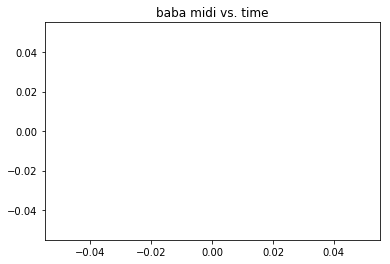

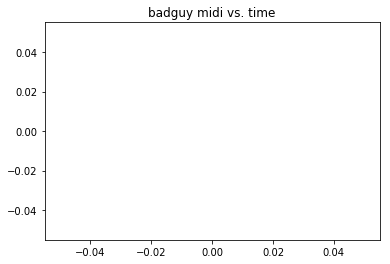

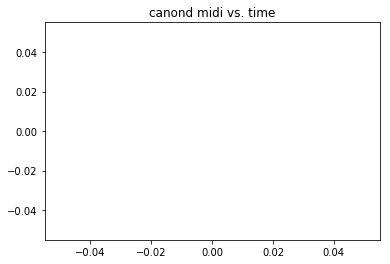

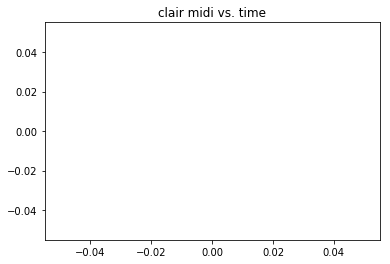

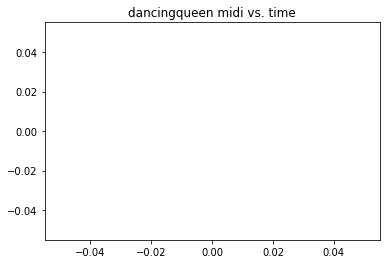

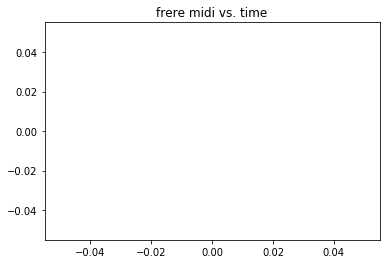

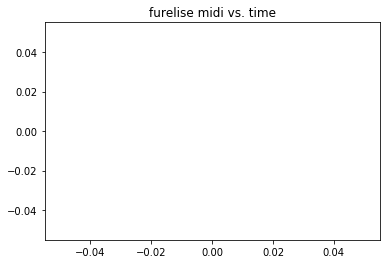

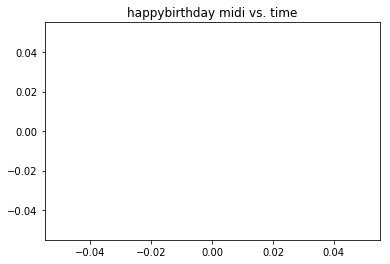

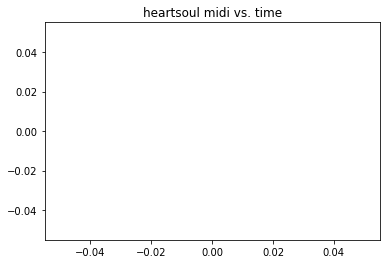

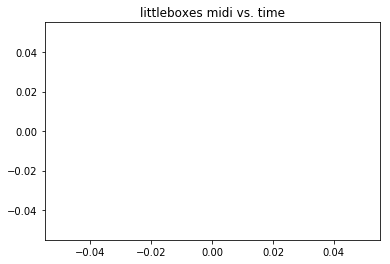

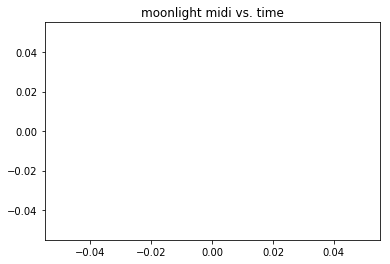

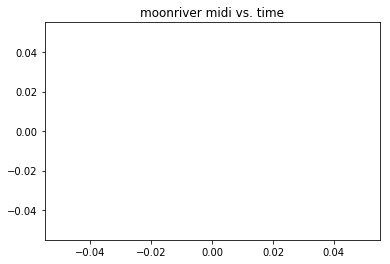

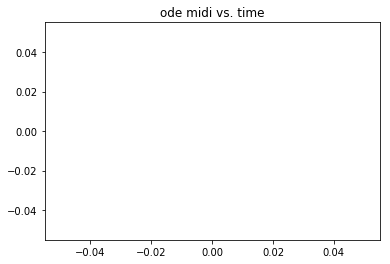

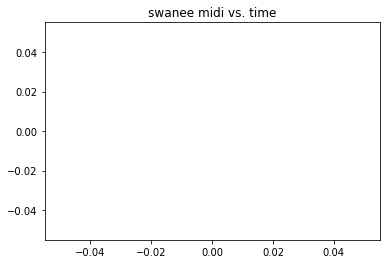

KeyboardInterrupt: 

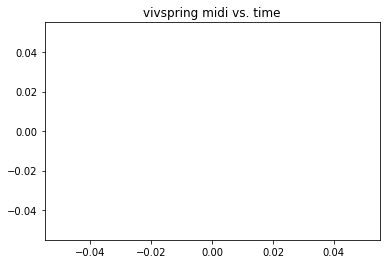

In [113]:
for song in songs: vis_score(song)

In [ ]:
df = vis_score('canond')[0]
df

In [44]:
def vis_delta(song):
    plt.clf()
    s = obj[song]
    dfs = []
    for i, track in enumerate(s):
        df = pd.DataFrame()
        for stat in ['tstep','midi']:
            df[stat]=s[track][stat]
        df['delta'] = df.diff()['midi'].fillna(0)
        try:
            
            #sns.lineplot(df['tstep'],df['delta']).set_title(song+' midi delta')
            sns.distplot(list(df['delta']),kde=False).set_title(song+' midi delta')
            
            dfs.append(df)
        except:
            continue
    plt.show()
    return dfs

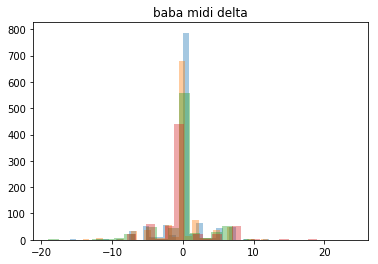

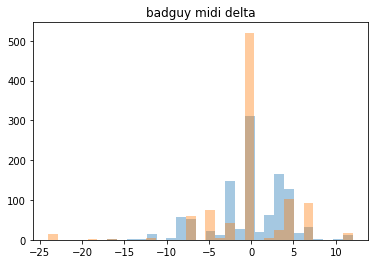

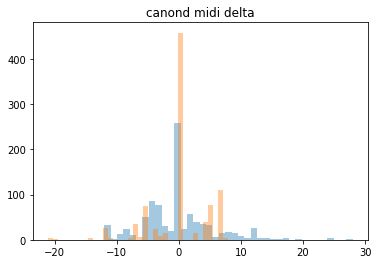

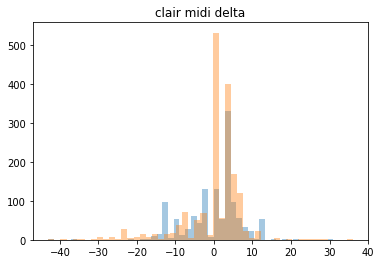

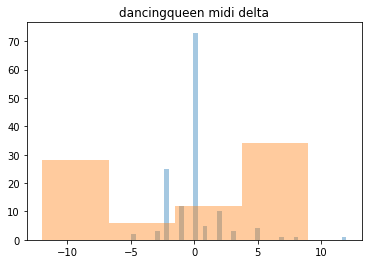

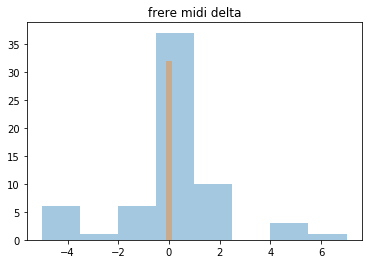

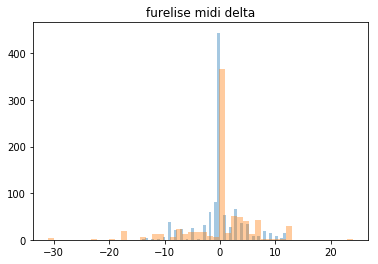

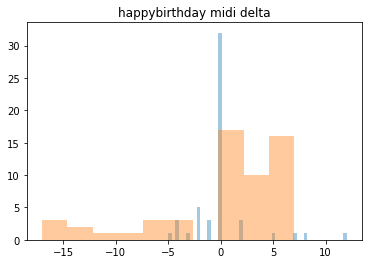

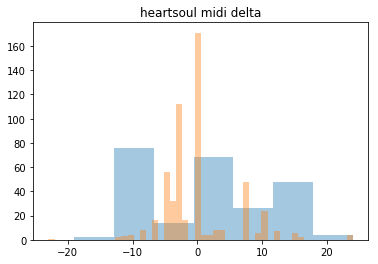

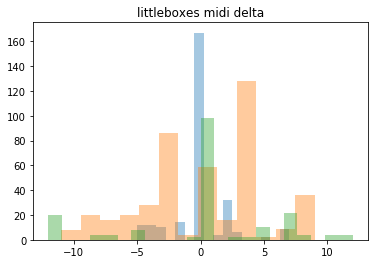

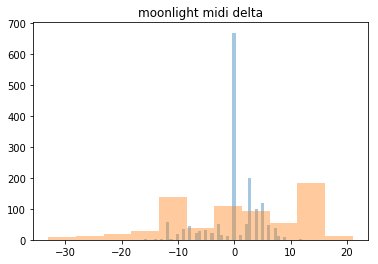

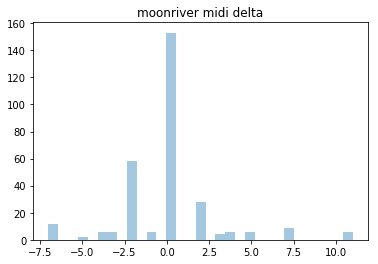

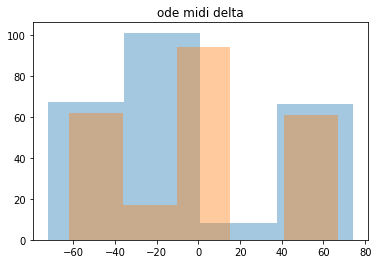

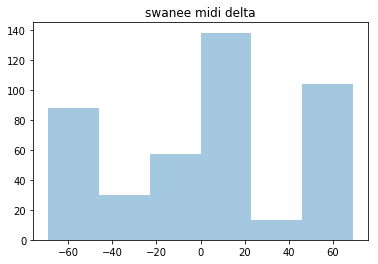

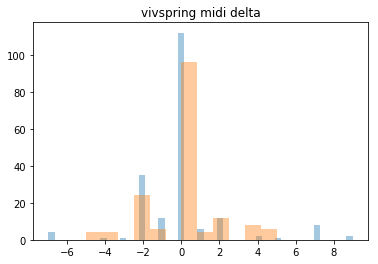

In [45]:
for song in songs: vis_delta(song)